# Documentation for ImageListener Module
### Author: Jose Rincon

__NOTE__:It is very important that you use Python2 as ROS currently does not support Python 3. <br> 
__Adding required packages to the module__

In [1]:
import rospy
from sensor_msgs.msg import Image
from sensor_msgs.msg import PointCloud2
from cv_bridge import CvBridge, CvBridgeError
import ros_numpy
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Class Definition ImageListener
__This class is described by: __<br>
1. __Constructor__:
    1. __image_data__: Cv2 type array. Possible types are "bgr8", "16UC1", or "mono8".
    2. __bridge__: Instance of CvBridge()
    3. __image_sub__: Instance of ROS topic subscriber
      

2. __Member Functions__:
    1. __callback__: this callback function is responsible for conversion of data to Cv2 types upon receving a new data from the Image topic


In [2]:
class ImageListener:

    def __init__(self, topic):
        self.image_data = None
        self.bridge = CvBridge()
        self.image_sub = rospy.Subscriber(topic, Image, self.callback)

    def callback(self, data):
        try:
            hey = 0
            if data.encoding == 'rgb8':
                cv_image = self.bridge.imgmsg_to_cv2(data, "bgr8")
            elif data.encoding == '16UC1':
                cv_image = self.bridge.imgmsg_to_cv2(data, "16UC1")
            elif data.encoding == 'mono8':
                cv_image = self.bridge.imgmsg_to_cv2(data, "mono8")

        except CvBridgeError as e:
            print(e)
        self.image_data = cv_image

## Example: 

In [17]:
def main():
    master_image_listener = ImageListener("/master/image_raw")
    #Creates new object of type ImageListener. The ROS topic we wish to 
    #connect is ("/master/image_raw")
    rospy.init_node('masterImageNode', anonymous=True)
    #Initialize ROS node (This must be done only once)
    rospy.rostime.wallsleep(0.005)
    #ROS needs some time to chill before you want to retrieve more data
    master_image = master_image_listener.image_data
    #Retrieve new data from the image topic.


## Expected return:

In [4]:
if __name__ == '__main__':
    main()

In [18]:
main()

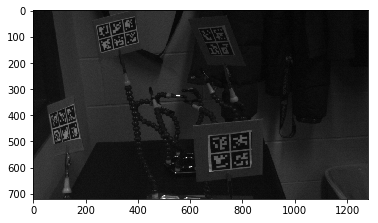

In [19]:
#plt.imshow(master_image)
#Plot image